## 使用sklearn来训练感知机模型

In [20]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from plot_decision_region import plot_decision_region
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

In [4]:
# 查看结果的种类
np.unique(y)

array([0, 1, 2])

In [7]:
# 使用train_test_split方法将数据集分割成两部分,训练集合测试集
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
# 使用StandardScaler方法来对数据进行标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 使用fit方法计算出u(样本平均值)和标准差,然后调用transform方法对数据集进行标准化,使用相同的参数对训练集和测试集进行标准化
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [12]:
# 训练感知机模型
from sklearn.linear_model import Perceptron
# 初始化Perceptron(设置random_state使得shuffle结果可以再现)
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
# 使用fit方法进行训练
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
# 训练好感知机模型后,使用predict方法进行预测
y_pred = ppn.predict(x_test_std)

In [14]:
# 打印预测错误的数量
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [16]:
# 计算Accuracy(准确率)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))  # 精确到2位小数

Accuracy: 0.91


In [18]:
# 可视化分类数据
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

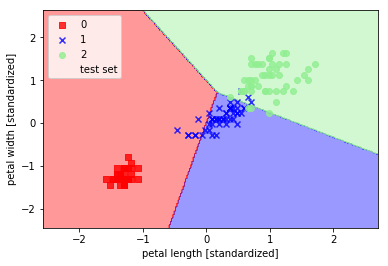

In [22]:
plot_decision_region(x=x_combined_std,
                    y=y_combined,
                    classifier=ppn,
                    test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

感知机算法对于不能够线性可分的数据拥有不会收敛,所以三个类别的花没有被线性决策界完美分类